# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | san luis de la loma
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | minas de marcona
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | keflavik
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bhikangaon
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | san juan sacatepeq

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,12.66,68,52,7.82,SH,1728497479
1,bethel,41.3712,-73.4140,18.52,46,20,5.14,US,1728497241
2,kruisfontein,-34.0033,24.7314,17.29,82,3,1.33,ZA,1728497481
3,whitehorse,60.7161,-135.0538,2.12,91,100,4.02,CA,1728497281
4,san luis de la loma,17.2706,-100.8939,28.32,76,70,2.19,MX,1728497484


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.66,68,52,7.82,SH,1728497479
1,bethel,41.3712,-73.4140,18.52,46,20,5.14,US,1728497241
2,kruisfontein,-34.0033,24.7314,17.29,82,3,1.33,ZA,1728497481
3,whitehorse,60.7161,-135.0538,2.12,91,100,4.02,CA,1728497281
4,san luis de la loma,17.2706,-100.8939,28.32,76,70,2.19,MX,1728497484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

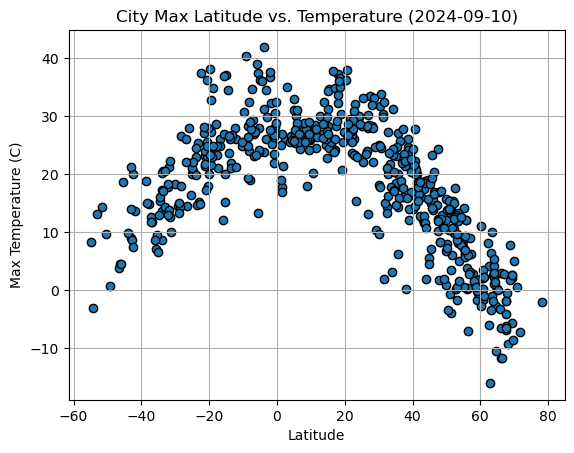

In [17]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-09-10)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

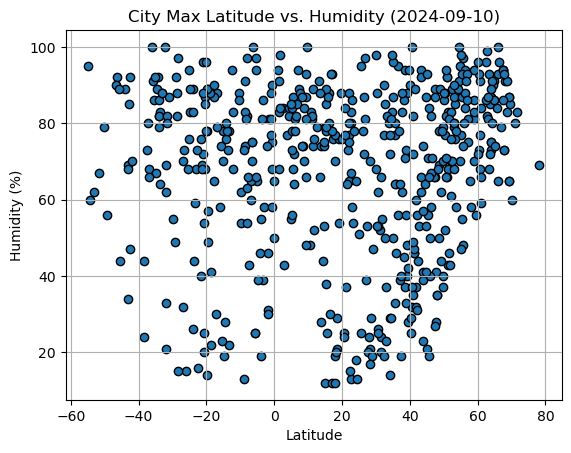

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Max Latitude vs. Humidity (2024-09-10)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

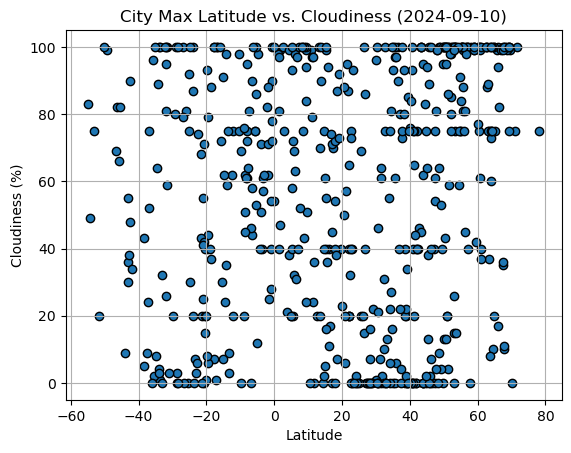

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Max Latitude vs. Cloudiness (2024-09-10)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

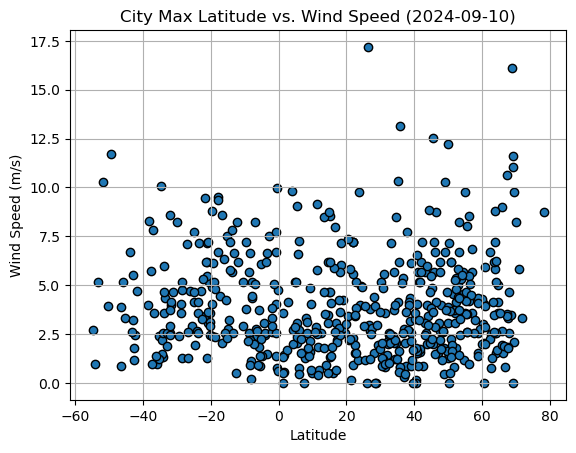

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Max Latitude vs. Wind Speed (2024-09-10)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def linear_regression_plot_function(x_values, y_values, xlabel, ylabel, title):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * x_values + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, "r-", linewidth=2)

    x_pos = x_values.min() 
    y_pos = y_values.min() 

    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    print(f"The r^2-value is: {rvalue**2}")
    
    # Show the plot
    plt.show()


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,18.52,46,20,5.14,US,1728497241
3,whitehorse,60.7161,-135.0538,2.12,91,100,4.02,CA,1728497281
4,san luis de la loma,17.2706,-100.8939,28.32,76,70,2.19,MX,1728497484
5,north bend,43.4065,-124.2243,17.36,94,100,2.57,US,1728497485
7,georgetown,5.4112,100.3354,26.96,87,20,2.06,MY,1728497015


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.66,68,52,7.82,SH,1728497479
2,kruisfontein,-34.0033,24.7314,17.29,82,3,1.33,ZA,1728497481
6,minas de marcona,-15.2119,-75.1103,15.21,78,91,7.54,PE,1728497361
10,punta arenas,-53.1500,-70.9167,13.06,62,75,5.14,CL,1728497238
13,blackmans bay,-43.0167,147.3167,9.07,69,36,5.54,AU,1728497496


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.711328677319025


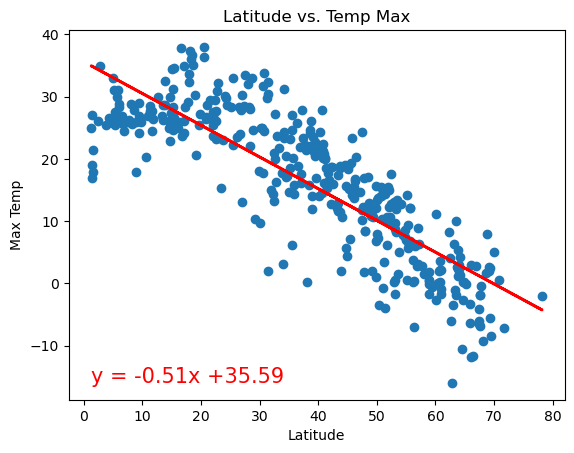

In [57]:
# Linear regression on Northern Hemisphere
linear_regression_plot_function(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    "Latitude",              
    "Max Temp", 
    "Latitude vs. Temp Max"
)

The r^2-value is: 0.5699392499092645


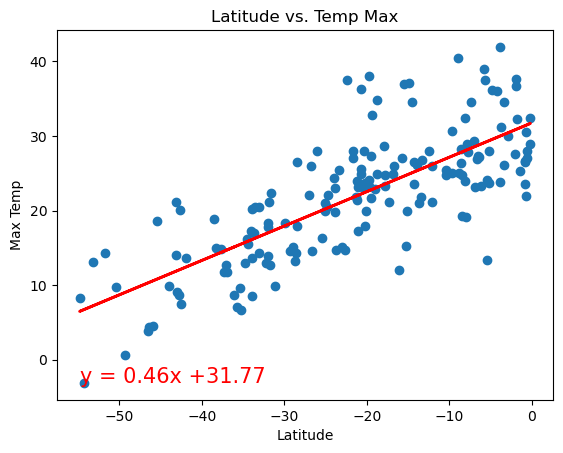

In [58]:
# Linear regression on Southern Hemisphere
linear_regression_plot_function(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    "Latitude",              
    "Max Temp", 
    "Latitude vs. Temp Max"
)

**Discussion about the linear relationship:** 
In Northern Hemisphere, as latitude increases (moving away from the equator towards the North Pole), maximum temperature tends to decrease.In Southern Hemisphere, a similar trend is observed. As latitude decreases (moving away from the equator towards the South Pole), maximum temperature tends to drop. The regions near the equator have higher temperatures, while those near the poles are cooler.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.02711756174991182


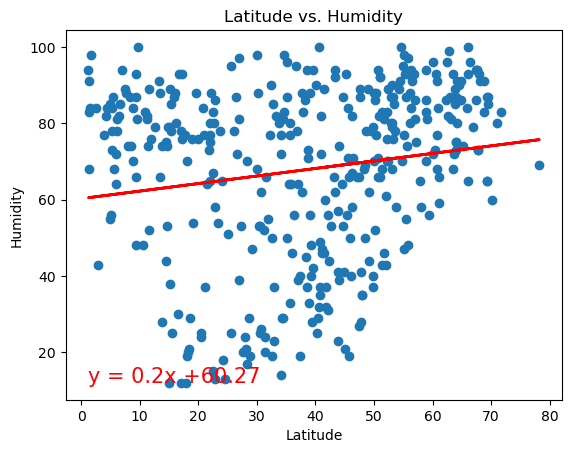

In [59]:
# Northern Hemisphere
linear_regression_plot_function(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    "Latitude",              
    "Humidity", 
    "Latitude vs. Humidity"
)

The r^2-value is: 0.015727790866441358


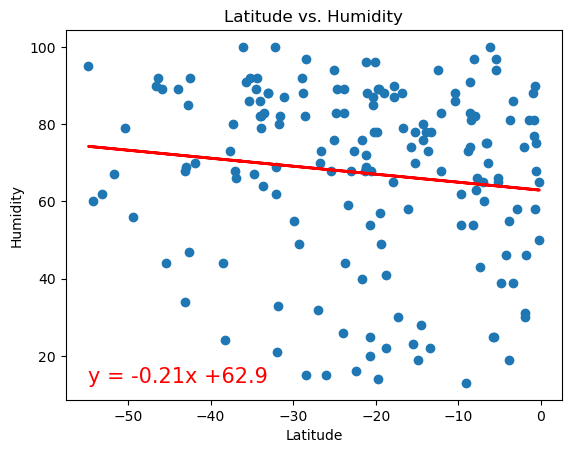

In [60]:
# Southern Hemisphere
linear_regression_plot_function(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    "Latitude",              
    "Humidity", 
    "Latitude vs. Humidity"
)

**Discussion about the linear relationship:**
The relationship between latitude and humidity can be more complex, as it is influenced by other factors. However, in our analysis it seems regions near the equator have lower humidity. Moving towards higher latitudes, humidity can vary but tends to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04497091318362727


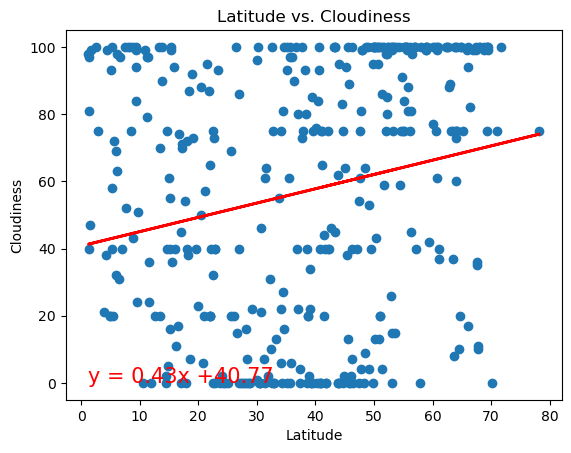

In [61]:
# Northern Hemisphere
linear_regression_plot_function(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    "Latitude",              
    "Cloudiness", 
    "Latitude vs. Cloudiness"
)

The r^2-value is: 0.01034730199159864


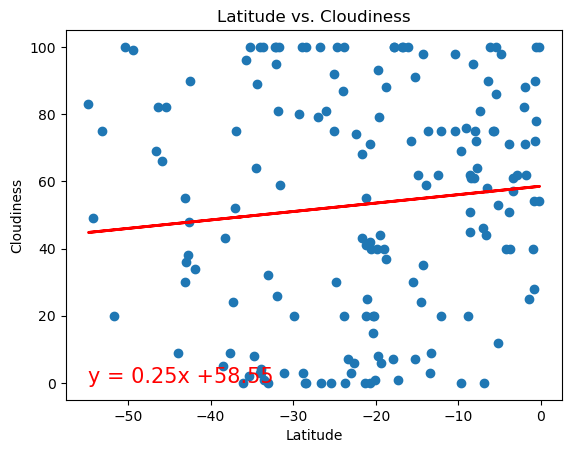

In [62]:
# Southern Hemisphere
linear_regression_plot_function(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    "Latitude",              
    "Cloudiness", 
    "Latitude vs. Cloudiness"
)


**Discussion about the linear relationship:**
Cloudiness does not show a straightforward relationship with latitude and can be vary depending on the season and regional climate. In our analysis it shows in Northern hemisphere cloudiness, increases toward higher latitudes but in Southern hemisphere cloudiness, decreases when it is getting closer to polar.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.023200179457465508


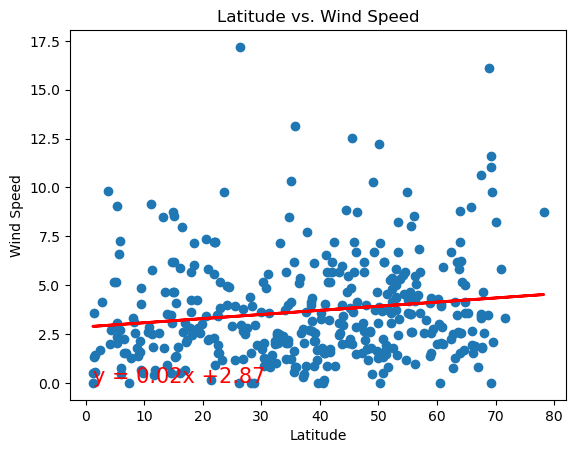

In [64]:
# Northern Hemisphere
linear_regression_plot_function(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    "Latitude",              
    "Wind Speed", 
    "Latitude vs. Wind Speed"
)

The r^2-value is: 0.0010227423847016047


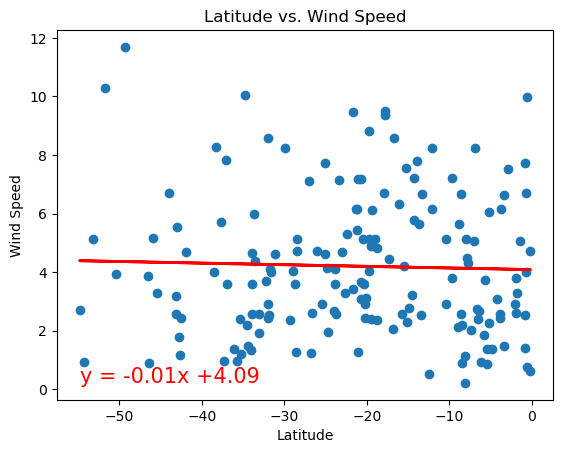

In [65]:
# Southern Hemisphere
linear_regression_plot_function(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    "Latitude",              
    "Wind Speed", 
    "Latitude vs. Wind Speed"
)

**Discussion about the linear relationship:**
In our analysis it shows near the equator, wind speeds tend to be lower.